In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
path = 'dublinfootfall2014.xls'
testDF = pd.read_excel(path, header=None)
testDF.drop(testDF.index[:4], inplace=True) #Drop the title of the sheet
testDF.drop(testDF.columns[15:],axis=1, inplace=True) # Drop Excess Columns
testDF.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
4,Entrance Name: O'Connell Street at Clerys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Mon,NaN,Tue,NaN,Wed,NaN,Thu,NaN,Fri,NaN,Sat,NaN,Sun,NaN
6,Time,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out
7,00:00:00,181,352,113,150,54,89,118,149,109,144,286,229,196,152
8,01:00:00,46,123,36,58,19,36,36,71,45,69,121,161,85,101


In [3]:
testDF.columns = testDF.iloc[2] # Make a row with appropriate entries the column headers
testDF.head(5)

6,Time,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out
4,Entrance Name: O'Connell Street at Clerys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Mon,NaN,Tue,NaN,Wed,NaN,Thu,NaN,Fri,NaN,Sat,NaN,Sun,NaN
6,Time,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out
7,00:00:00,181,352,113,150,54,89,118,149,109,144,286,229,196,152
8,01:00:00,46,123,36,58,19,36,36,71,45,69,121,161,85,101


In [4]:
testDF = testDF[testDF.Time != "Time"] #Drop the rows in the time column that say time
testDF.dropna(subset = ['Time'], inplace=True) # Drop blank rows in the ime column
testDF.head(5)

6,Time,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out
4,Entrance Name: O'Connell Street at Clerys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,00:00:00,181,352,113,150,54,89,118,149,109,144,286,229,196,152
8,01:00:00,46,123,36,58,19,36,36,71,45,69,121,161,85,101
9,02:00:00,22,47,15,38,5,28,12,32,27,51,61,151,69,105
10,03:00:00,5,35,9,25,5,18,14,33,25,43,60,145,31,110


In [5]:
print(len(testDF)) # Length of our cleaned DF

325


In [6]:
# Create a set of DFs that are each 25 rows long. ie the title and 24 hours for each carpark
list_of_dfs = [testDF.iloc[25*n:25*(n+1)] for n in range(int(len(testDF)/25))] 
len(list_of_dfs)

13

In [26]:
OCDF = list_of_dfs[0] # Take one DF as an example
OCDF = OCDF.drop(OCDF.index[:1]) # Remove the row with the carpark name
print(len(OCDF))
OCDF.head()

24


6,Time,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out,In,Out
7,00:00:00,181,352,113,150,54,89,118,149,109,144,286,229,196,152
8,01:00:00,46,123,36,58,19,36,36,71,45,69,121,161,85,101
9,02:00:00,22,47,15,38,5,28,12,32,27,51,61,151,69,105
10,03:00:00,5,35,9,25,5,18,14,33,25,43,60,145,31,110
11,04:00:00,7,26,5,14,5,16,6,15,6,20,21,69,17,49


In [27]:
monDF = OCDF.iloc[:,[0,1,2]] # Take the first 3 rows to create a DF of just one day's entries
print(len(monDF)) # Should be 24 hours long
monDF.head()

24


6,Time,In,Out
7,00:00:00,181,352
8,01:00:00,46,123
9,02:00:00,22,47
10,03:00:00,5,35
11,04:00:00,7,26


In [28]:
steps = list(range(1, 15, 2))

day_dfs = [OCDF.iloc[:,[0,n,n+1]] for n in steps] # Create a series of dfs as above. One for each day
len(day_dfs)

7

In [29]:
newDF = pd.concat(day_dfs) # Reconstitute the DFs into one long DF
print(len(newDF))
newDF.head(5)

168


6,Time,In,Out
7,00:00:00,181,352
8,01:00:00,46,123
9,02:00:00,22,47
10,03:00:00,5,35
11,04:00:00,7,26


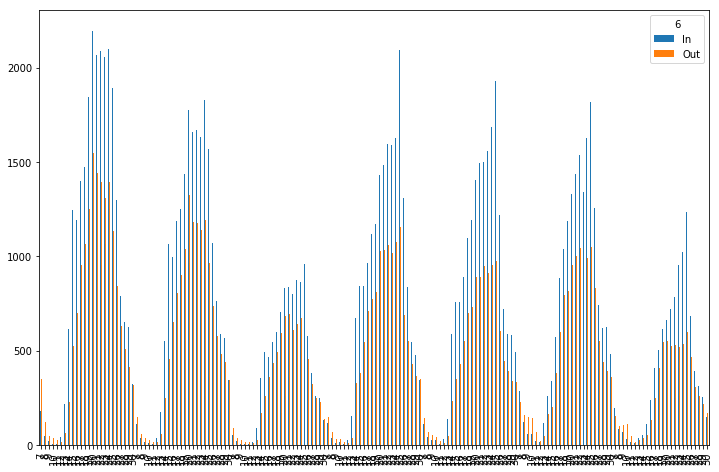

In [34]:
ax = newDF.plot(figsize=(12,8), kind="bar") # Preliminary plot of foot traffic captured in the area
plt.show()